In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Github/questions.csv")

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


0    255045
1    149306
Name: is_duplicate, dtype: int64


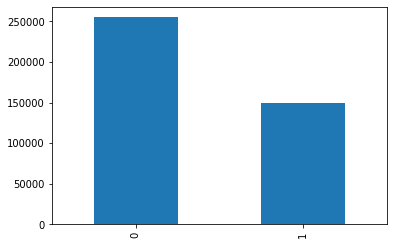

In [5]:
print(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts().plot(kind='bar')

In [6]:
new_df = df.sample(30000)

In [7]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
242798,242798,478207,478208,I am confused either to do house job first or ...,I am a part of the IBDP class of 2017. Can I s...,0
942,942,1885,1886,Can I overdraft my Wells Fargo account?,What is Wells Fargo's overdraft policy?,0
312399,312399,613176,613177,Can I be pregnant while having a missed period?,Can one be pregnant without having a missed pe...,1
132695,132695,262806,262807,Why am I scared to be in a relationship?,Why do I feel so scared and nervous in a relat...,1
304775,304775,598445,598446,Who has an Instagram account?,How do you create an Instagram account?,0


In [9]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:
new_df.duplicated().sum()

0

0    18899
1    11101
Name: is_duplicate, dtype: int64
0    62.996667
1    37.003333
Name: is_duplicate, dtype: float64


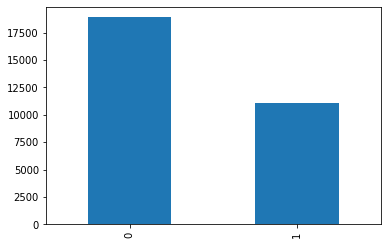

In [11]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59818
Number of questions getting repeated 162


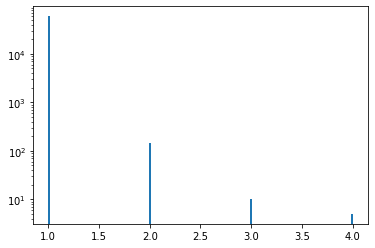

In [13]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [14]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [15]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
242798,242798,478207,478208,I am confused either to do house job first or ...,I am a part of the IBDP class of 2017. Can I s...,0,113,107
942,942,1885,1886,Can I overdraft my Wells Fargo account?,What is Wells Fargo's overdraft policy?,0,39,39
312399,312399,613176,613177,Can I be pregnant while having a missed period?,Can one be pregnant without having a missed pe...,1,47,51
132695,132695,262806,262807,Why am I scared to be in a relationship?,Why do I feel so scared and nervous in a relat...,1,40,54
304775,304775,598445,598446,Who has an Instagram account?,How do you create an Instagram account?,0,29,39


In [16]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row : len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
242798,242798,478207,478208,I am confused either to do house job first or ...,I am a part of the IBDP class of 2017. Can I s...,0,113,107,20,26
942,942,1885,1886,Can I overdraft my Wells Fargo account?,What is Wells Fargo's overdraft policy?,0,39,39,7,6
312399,312399,613176,613177,Can I be pregnant while having a missed period?,Can one be pregnant without having a missed pe...,1,47,51,9,9
132695,132695,262806,262807,Why am I scared to be in a relationship?,Why do I feel so scared and nervous in a relat...,1,40,54,9,11
304775,304775,598445,598446,Who has an Instagram account?,How do you create an Instagram account?,0,29,39,5,7


In [17]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [18]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
242798,242798,478207,478208,I am confused either to do house job first or ...,I am a part of the IBDP class of 2017. Can I s...,0,113,107,20,26,4
942,942,1885,1886,Can I overdraft my Wells Fargo account?,What is Wells Fargo's overdraft policy?,0,39,39,7,6,2
312399,312399,613176,613177,Can I be pregnant while having a missed period?,Can one be pregnant without having a missed pe...,1,47,51,9,9,7
132695,132695,262806,262807,Why am I scared to be in a relationship?,Why do I feel so scared and nervous in a relat...,1,40,54,9,11,6
304775,304775,598445,598446,Who has an Instagram account?,How do you create an Instagram account?,0,29,39,5,7,3


In [19]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [20]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
242798,242798,478207,478208,I am confused either to do house job first or ...,I am a part of the IBDP class of 2017. Can I s...,0,113,107,20,26,4,44
942,942,1885,1886,Can I overdraft my Wells Fargo account?,What is Wells Fargo's overdraft policy?,0,39,39,7,6,2,13
312399,312399,613176,613177,Can I be pregnant while having a missed period?,Can one be pregnant without having a missed pe...,1,47,51,9,9,7,18
132695,132695,262806,262807,Why am I scared to be in a relationship?,Why do I feel so scared and nervous in a relat...,1,40,54,9,11,6,20
304775,304775,598445,598446,Who has an Instagram account?,How do you create an Instagram account?,0,29,39,5,7,3,12


In [21]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
242798,242798,478207,478208,I am confused either to do house job first or ...,I am a part of the IBDP class of 2017. Can I s...,0,113,107,20,26,4,44,0.09
942,942,1885,1886,Can I overdraft my Wells Fargo account?,What is Wells Fargo's overdraft policy?,0,39,39,7,6,2,13,0.15
312399,312399,613176,613177,Can I be pregnant while having a missed period?,Can one be pregnant without having a missed pe...,1,47,51,9,9,7,18,0.39
132695,132695,262806,262807,Why am I scared to be in a relationship?,Why do I feel so scared and nervous in a relat...,1,40,54,9,11,6,20,0.30
304775,304775,598445,598446,Who has an Instagram account?,How do you create an Instagram account?,0,29,39,5,7,3,12,0.25


minimum characters 1
maximum characters 623
average num of characters 59


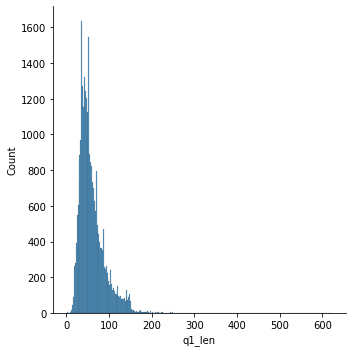

In [22]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 2
maximum characters 571
average num of characters 59


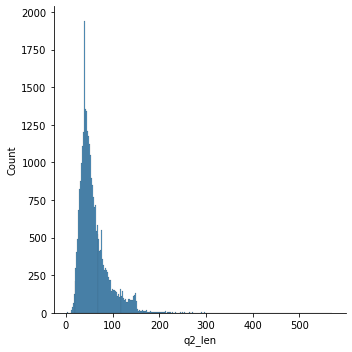

In [23]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 125
average num of words 10


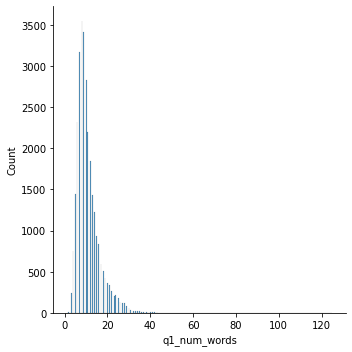

In [24]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 108
average num of words 11


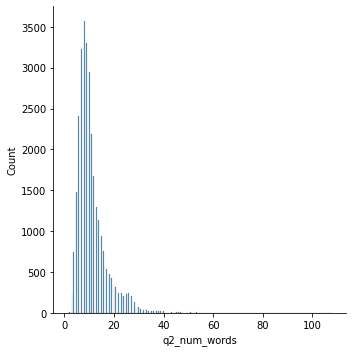

In [25]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


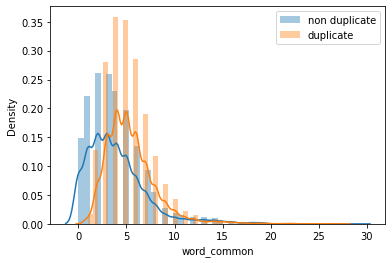

In [26]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


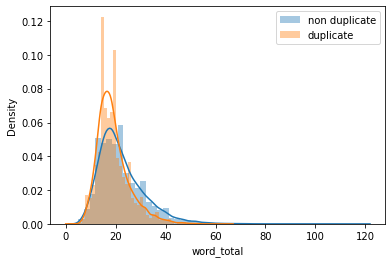

In [27]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


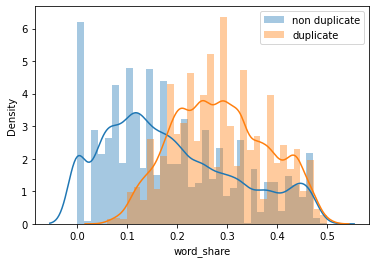

In [28]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [29]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
242798,I am confused either to do house job first or ...,I am a part of the IBDP class of 2017. Can I s...
942,Can I overdraft my Wells Fargo account?,What is Wells Fargo's overdraft policy?
312399,Can I be pregnant while having a missed period?,Can one be pregnant without having a missed pe...
132695,Why am I scared to be in a relationship?,Why do I feel so scared and nervous in a relat...
304775,Who has an Instagram account?,How do you create an Instagram account?


In [30]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
242798,0,113,107,20,26,4,44,0.09
942,0,39,39,7,6,2,13,0.15
312399,1,47,51,9,9,7,18,0.39
132695,1,40,54,9,11,6,20,0.30
304775,0,29,39,5,7,3,12,0.25


In [31]:
from sklearn.feature_extraction.text import CountVectorizer 

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features = 3000)
q1_arr , q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) 


In [32]:
temp_df1 = pd.DataFrame(q1_arr,index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [33]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
242798,0,113,107,20,26,4,44,0.09,0,0,...,0,0,0,0,0,0,0,0,0,0
942,0,39,39,7,6,2,13,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
312399,1,47,51,9,9,7,18,0.39,0,0,...,0,0,0,0,0,0,0,0,0,0
132695,1,40,54,9,11,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
304775,0,29,39,5,7,3,12,0.25,0,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7743333333333333